# <span style="color:orange"> 4th project - Regression analysis </span>


## <span style="color:orange"> Summary</span><a name="Contents"></a>
1. [Step 1: Dataset](#step1)
2. [Step 2: The data understanding](#step2)
3. [Step 3: Handling data](#step3)
4. [Step 4: Analysing data](#step4)


## <span style="color:orange">Step 1: Dataset [Montreal Bike Lanes]</span><a name="step1"></a>

<span style="color:gray">The dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2015.
    
<span style="color:gray">Dataset source by **Kaggle**. Click [here](https://www.kaggle.com/datasets/pablomonleon/montreal-bike-lanes?resource=download).</span> 



<div style="text-align: right"
     
[summary](#Contents)


## <span style="color:orange">Step 2: The data understanding</span><a name="step2"></a>

<div style="text-align: right"
     
     
[Summary](#Contents)

In [205]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [206]:
df_raw = pd.read_csv('comptagesvelo2015.csv')
df_raw.head()

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,02/01/2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,03/01/2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,04/01/2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,05/01/2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


In [207]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         319 non-null    object 
 1   Unnamed: 1                   319 non-null    object 
 2   Berri1                       319 non-null    int64  
 3   Boyer                        319 non-null    int64  
 4   Brébeuf                      319 non-null    int64  
 5   CSC (Côte Sainte-Catherine)  319 non-null    int64  
 6   Maisonneuve_1                62 non-null     float64
 7   Maisonneuve_2                319 non-null    int64  
 8   Maisonneuve_3                319 non-null    int64  
 9   Notre-Dame                   319 non-null    int64  
 10  Parc                         319 non-null    int64  
 11  Parc U-Zelt Test             52 non-null     float64
 12  PierDup                      319 non-null    int64  
 13  Pont_Jacques_Cartier

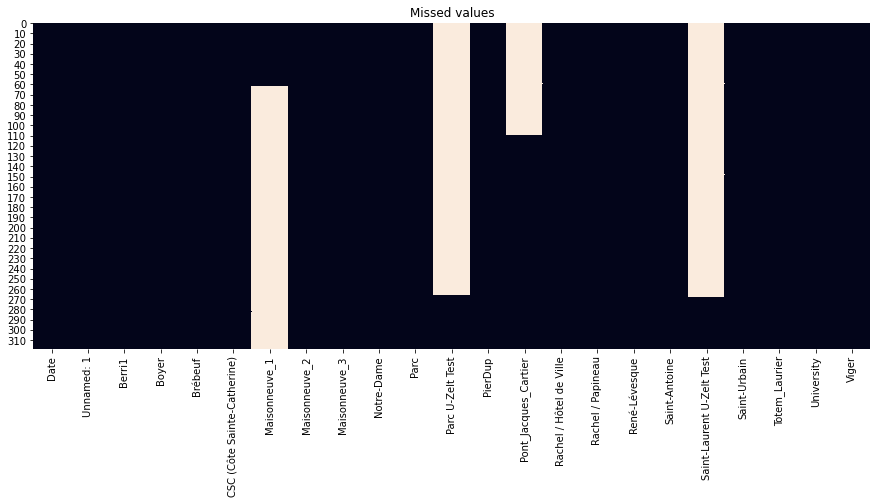

In [208]:
# analysing missing values
plt.figure( figsize=(15,6) )
plt.title('Missed values')
sns.heatmap( df_raw.isnull(), cbar=False );

In [209]:
df_raw['Unnamed: 1'].nunique()

1

<div class="aler aler-block alert-warning">
    <b>**Warning** For ignored reasons several of data was missed in some lanes. Plus, the second column named "unamed: 1" don"t give us any substatial values to be considerated. Because that, those columns it'll be dropped from our analysis.</b>
</div>

## <span style="color:orange">Step 3: Handling data</span><a name="step3"></a>

<div style="text-align: right"
     
[Summary](#Contents)

In [210]:
df_raw.dropna(axis=1, inplace=True)

In [211]:
df_dropped = df_raw.drop(columns =['Unnamed: 1'])

In [212]:
df_dropped['Date'] = pd.to_datetime(df_dropped['Date'])

In [213]:
# creating auxiliar columns from 'Date' column
df_dropped['year'] = df_dropped['Date'].dt.year
df_dropped['month'] = df_dropped['Date'].dt.month
df_dropped['day'] = df_dropped['Date'].dt.day
df_dropped['weekday'] = df_dropped['Date'].dt.weekday


In [214]:
week = {0 : 'monday',
        1 : 'tuesday',
        2 : 'wednesday',
        3 : 'thursday',
        4 : 'friday',
        5 : 'saturday',
        6 : 'sunday' }

df_dropped['day_name'] = df_dropped['weekday'].map(week)

In [215]:
df_dropped.head()

,Date,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,...,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger,year,month,day,weekday,day_name
0,2015-01-01,58,12,4,17,49,21,16,16,7,...,3,17,78,21,6,2015,1,1,3,thursday
1,2015-02-01,75,7,5,15,113,27,9,32,11,...,13,11,57,77,4,2015,2,1,6,sunday
2,2015-03-01,79,7,3,7,107,36,12,18,2,...,5,14,174,40,5,2015,3,1,6,sunday
3,2015-04-01,10,1,21,0,35,29,1,0,0,...,1,1,20,6,0,2015,4,1,2,wednesday
4,2015-05-01,42,0,2,0,90,21,1,1,6,...,20,0,41,56,10,2015,5,1,4,friday


In [216]:
# reordering columns
df_dropped.iloc[:, [0,22,21,18,19,20,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]

,Date,day_name,weekday,year,month,day,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),...,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
0,2015-01-01,thursday,3,2015,1,1,58,12,4,17,...,16,7,58,91,24,3,17,78,21,6
1,2015-02-01,sunday,6,2015,2,1,75,7,5,15,...,32,11,109,177,32,13,11,57,77,4
2,2015-03-01,sunday,6,2015,3,1,79,7,3,7,...,18,2,71,131,33,5,14,174,40,5
3,2015-04-01,wednesday,2,2015,4,1,10,1,21,0,...,0,0,6,11,6,1,1,20,6,0
4,2015-05-01,friday,4,2015,5,1,42,0,2,0,...,1,6,0,5,49,20,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-11-11,wednesday,2,2015,11,11,3044,1931,2828,1393,...,2342,458,2328,3280,1210,338,1534,1527,2860,356
315,2015-12-11,friday,4,2015,12,11,1751,930,1670,888,...,1566,152,1345,1877,755,180,960,955,1777,198
316,2015-11-13,friday,4,2015,11,13,1818,906,1711,873,...,1522,150,1416,1980,719,204,978,1040,1727,258
317,2015-11-14,saturday,5,2015,11,14,979,759,978,322,...,601,98,1061,1448,269,70,640,805,737,73


## <span style="color:orange">Step 4: Analysing data</span><a name="step4"></a>

<div style="text-align: right"
     
[Summary](#Contents)

<span style="color:blue">Our challenge is find out standards along of 2015 year to describe whether exist some match among the dates and the lanes.
</span>

In [217]:
df_dropped.describe()

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,...,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger,year,month,day,weekday
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.0,319.000000,319.000000,319.000000
mean,2915.398119,2212.909091,2859.485893,1167.388715,2208.031348,1011.175549,1137.316614,1754.257053,1130.708464,2207.626959,...,1477.206897,207.476489,1387.119122,1903.363636,2023.708464,295.347962,2015.0,5.990596,15.144201,3.012539
std,2276.281648,1832.808709,2337.531344,960.020397,2452.475658,917.450049,991.065590,1415.004315,1207.658163,1660.936427,...,1254.990855,231.009131,1070.781272,1376.375755,1632.368428,248.947624,0.0,3.189493,8.968037,1.992083
min,10.000000,0.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,20.000000,6.000000,0.000000,2015.0,1.000000,1.000000,0.000000
25%,387.500000,3.500000,33.000000,54.500000,214.500000,119.000000,25.500000,61.000000,3.000000,324.500000,...,159.500000,15.500000,244.500000,457.000000,352.500000,47.000000,2015.0,3.000000,7.000000,1.000000
50%,3044.000000,2180.000000,3011.000000,1162.000000,689.000000,1049.000000,1067.000000,1787.000000,685.000000,2361.000000,...,1422.000000,107.000000,1519.000000,1855.000000,1762.000000,267.000000,2015.0,6.000000,15.000000,3.000000
75%,4968.000000,3937.000000,5088.000000,1948.000000,4114.500000,1675.000000,2094.500000,3025.500000,2168.000000,3658.000000,...,2676.000000,337.000000,2237.000000,3111.000000,3539.000000,526.000000,2015.0,9.000000,23.000000,5.000000
max,7387.000000,6153.000000,7322.000000,3334.000000,7905.000000,9999.000000,3035.000000,4867.000000,4787.000000,7921.000000,...,4118.000000,781.000000,4342.000000,5166.000000,5596.000000,820.000000,2015.0,12.000000,31.000000,6.000000


<span style="color:blue">On the table above we can see some statistics about the lanes: maximum and minimum number per lane, average per lane, etc.
</span>

In [223]:
top_lanes = df_dropped.drop(columns =['month', 'day', 'weekday', 'Date', 'day_name', 'year'])

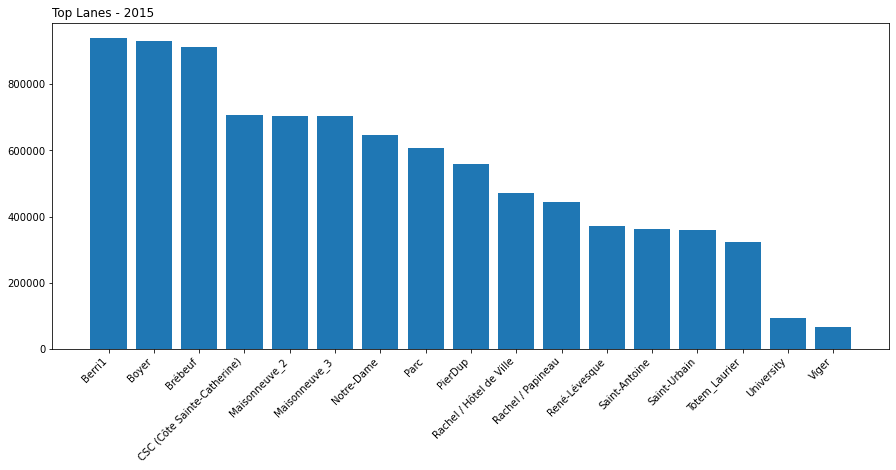

In [224]:
# showing top lanes by amount bikes vs lanes
plt.figure( figsize=(15,6) )
plt.title('Top Lanes - 2015', loc='left')
plt.bar( top_lanes.columns, top_lanes.sum().sort_values(ascending=False) )
plt.xticks( rotation=45, ha='right' );

<span style="color:blue">In graphic above, we have Berri1, Boyer and Brébeuf in higher trafic of the lanes.

In [225]:
lanes_month = df_dropped.drop(columns =['day', 'weekday', 'Date', 'day_name', 'year'])

In [226]:
sumup_month = lanes_month.groupby('month').aggregate(sum)

In [227]:
sumup_month['total_m'] = sumup_mounth.iloc[:,:].sum(axis=1)

In [232]:
sumup_month.reset_index('month', inplace=True)

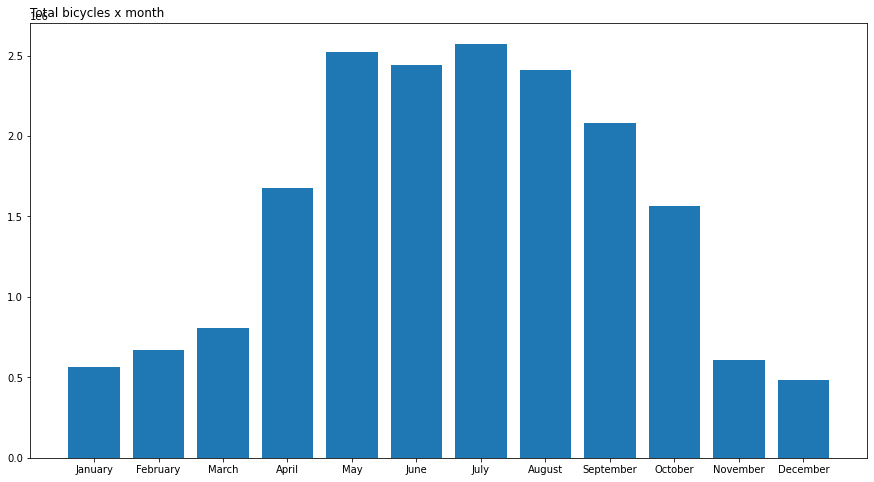

In [235]:
plt.figure( figsize=(15,8) )
label = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
plt.title('Total bicycles x month', loc='left')
plt.bar(sumup_month['month'], sumup_month['total_m']  )
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12), (label));


<span style="color:blue">As we can see, the highest numbers of bicycles using the lanes occur on summer.

In [240]:
lanes_day = df_dropped.drop(columns =['day', 'Date', 'weekday', 'year', 'month'])

In [241]:
lanes_day

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger,day_name
0,58,12,4,17,49,21,16,16,7,58,91,24,3,17,78,21,6,thursday
1,75,7,5,15,113,27,9,32,11,109,177,32,13,11,57,77,4,sunday
2,79,7,3,7,107,36,12,18,2,71,131,33,5,14,174,40,5,sunday
3,10,1,21,0,35,29,1,0,0,6,11,6,1,1,20,6,0,wednesday
4,42,0,2,0,90,21,1,1,6,0,5,49,20,0,41,56,10,friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,3044,1931,2828,1393,3603,1754,1142,2342,458,2328,3280,1210,338,1534,1527,2860,356,wednesday
315,1751,930,1670,888,2048,700,675,1566,152,1345,1877,755,180,960,955,1777,198,friday
316,1818,906,1711,873,2115,634,477,1522,150,1416,1980,719,204,978,1040,1727,258,friday
317,979,759,978,322,1112,290,310,601,98,1061,1448,269,70,640,805,737,73,saturday


In [243]:
sumup_day = lanes_day.groupby('day_name').aggregate(sum)

In [245]:
sumup_day['total_d'] = sumup_day.iloc[:,:].sum(axis=1)

In [247]:
sumup_day.reset_index('day_name', inplace=True)

In [248]:
sumup_day

,day_name,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger,total_d
0,friday,150807,109011,145136,59512,110607,50356,58693,93810,48807,110100,145819,76901,11161,74218,94955,110464,15906,1466263
1,monday,140765,106098,140219,61185,100617,50356,57913,88540,51829,100888,138799,74883,11598,65765,91139,103920,15333,1399847
2,saturday,107448,95052,110453,37263,82394,35086,41191,55663,56666,93209,123203,52791,6207,52741,77199,58514,8848,1093928
3,sunday,102592,88515,105689,41383,83510,35130,40331,61128,51253,95809,118452,51236,5588,50596,74370,64249,9139,1078970
4,thursday,139695,103945,135755,55144,109698,46515,54051,82980,52328,102156,137493,70516,9515,65775,88671,96405,14269,1364911
5,tuesday,137486,96557,130760,55606,103924,45940,51997,83662,47855,96788,130043,68115,10284,63560,86688,100047,14631,1323943
6,wednesday,151219,106740,144164,62304,113612,59182,58628,93825,51958,105283,143826,76787,11832,69836,94151,111964,16090,1471401


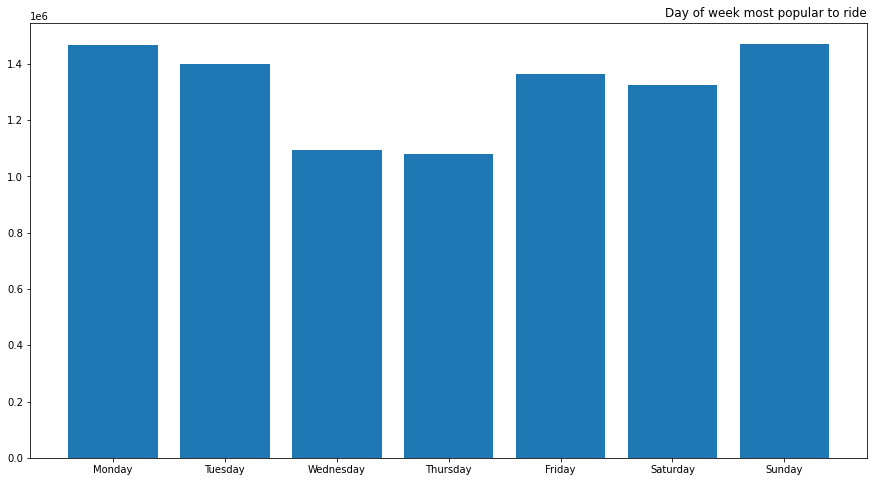

In [254]:
plt.figure( figsize=(15,8) )
label = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
plt.title('Day of week most popular to ride', loc='right')
plt.bar(sumup_day['day_name'], sumup_day['total_d']  )
plt.xticks((0,1,2,3,4,5,6), (label));

<span style="color:blue">The most popular days that people use to ride are sundays and mondays.
    
[Summary](#Contents)